## Plot confusion matrix on test set

In [1]:
from pathlib import Path
import numpy as np
import os
import yaml
from src.utils.plot_utils import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef as MCC


/Users/nicolebussola/anaconda3/envs/otsuka/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
experiment_dir = "../"
batch_test_preds = np.load(f"{experiment_dir}/test_preds.npy", allow_pickle=True)
batch_test_targets = np.load(f"{experiment_dir}/test_targets.npy", allow_pickle=True)
test_preds = np.concatenate(batch_test_preds, axis=None)
test_targets = np.concatenate(batch_test_targets, axis=None)

print("MCC on test set = ", round(MCC(test_targets, test_preds),3))

MCC on test set =  0.782


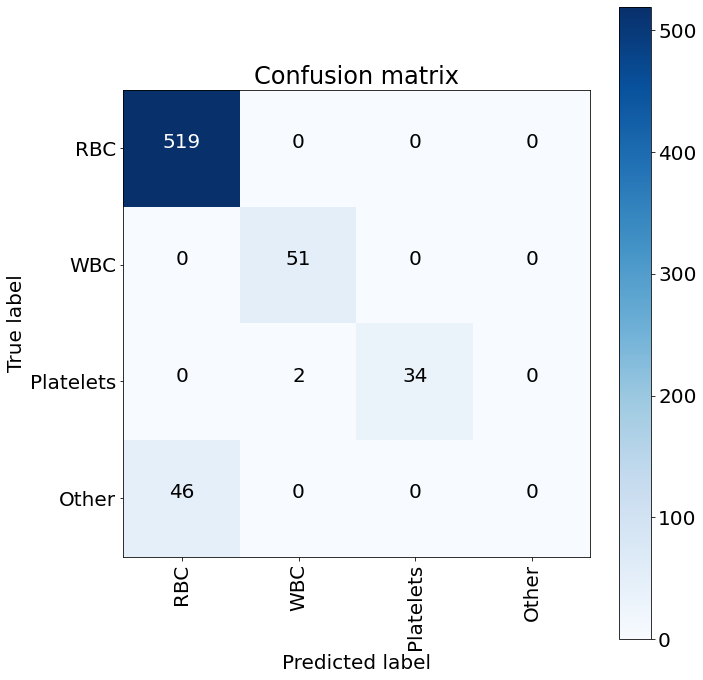

In [3]:
plot_confusion_matrix(experiment_dir=experiment_dir, 
                      classes=["RBC","WBC", "Platelets", "Other"], 
                      normalize=False, 
                      preds = test_preds,
                      trues = test_targets,

                      save=True, filename='CM_test', ext='pdf')